# Etude de marché - La poule qui chante

## Partie 1 - Préparation

In [65]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [66]:
df = pd.read_csv("fichier_final.csv", sep=";", encoding='mac_roman', index_col=0)
df.head()

,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes)
Pays,,,,,,,,
Afghanistan,6933.62,NaN,28845767,5573,5.0,NaN,29.0,28.0
Afrique du Sud,169753.52,1778.70,50901472,8789,143.0,63.0,514.0,1667.0
Albanie,5752.12,2669.65,2994856,1546,85.0,0.0,38.0,13.0
Algérie,81133.00,2515.95,35858474,2024,22.0,0.0,2.0,275.0
Allemagne,2052512.60,1368.77,81527014,816,71.0,646.0,842.0,1514.0


J'ai laissé la France dans la liste des pays, je vais donc supprimer la ligne.

In [67]:
df[df.index == 'France']

,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes)
Pays,,,,,,,,
France,1478714.66,1620.22,62374184,0,92.0,501.0,506.0,1750.0


In [68]:
df = df.drop('France')

In [69]:
df.shape

(170, 8)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Chine, Taiwan Province de
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   PIB (M)                                                     169 non-null    float64
 1   Prix Volaille (USD/tonne)                                   91 non-null     float64
 2   Population (M)                                              170 non-null    int64  
 3   Distance (km)                                               170 non-null    int64  
 4   Disponibilité alimentaire - Volailles (Kcal/personne/jour)  168 non-null    float64
 5   Exportations - Volailles (Milliers tonnes)                  134 non-null    float64
 6   Importations - Volailles (Milliers tonnes)                  168 non-null    float64
 7   Production - Volailles (Milliers tonnes)                    167

In [71]:
df.isna().mean()

PIB (M)                                                       0.005882
Prix Volaille (USD/tonne)                                     0.464706
Population (M)                                                0.000000
Distance (km)                                                 0.000000
Disponibilité alimentaire - Volailles (Kcal/personne/jour)    0.011765
Exportations - Volailles (Milliers tonnes)                    0.211765
Importations - Volailles (Milliers tonnes)                    0.011765
Production - Volailles (Milliers tonnes)                      0.017647
dtype: float64

In [72]:
df.duplicated().sum()

0

Je vais remplacer les valeurs manquantes par la valeur moyenne de chaque colonne.

In [73]:
df = df.fillna(df.mean())
df.isna().mean()

PIB (M)                                                       0.0
Prix Volaille (USD/tonne)                                     0.0
Population (M)                                                0.0
Distance (km)                                                 0.0
Disponibilité alimentaire - Volailles (Kcal/personne/jour)    0.0
Exportations - Volailles (Milliers tonnes)                    0.0
Importations - Volailles (Milliers tonnes)                    0.0
Production - Volailles (Milliers tonnes)                      0.0
dtype: float64

Je vais séparer les données. D'un coté X la matrice des données :

In [74]:
X = df.values
X[:5]

array([[6.93362000e+03, 2.23836582e+03, 2.88457670e+07, 5.57300000e+03,
        5.00000000e+00, 1.29432836e+02, 2.90000000e+01, 2.80000000e+01],
       [1.69753520e+05, 1.77870000e+03, 5.09014720e+07, 8.78900000e+03,
        1.43000000e+02, 6.30000000e+01, 5.14000000e+02, 1.66700000e+03],
       [5.75212000e+03, 2.66965000e+03, 2.99485600e+06, 1.54600000e+03,
        8.50000000e+01, 0.00000000e+00, 3.80000000e+01, 1.30000000e+01],
       [8.11330000e+04, 2.51595000e+03, 3.58584740e+07, 2.02400000e+03,
        2.20000000e+01, 0.00000000e+00, 2.00000000e+00, 2.75000000e+02],
       [2.05251260e+06, 1.36877000e+03, 8.15270140e+07, 8.16000000e+02,
        7.10000000e+01, 6.46000000e+02, 8.42000000e+02, 1.51400000e+03]])

In [75]:
type(X)

numpy.ndarray

In [76]:
X.shape

(170, 8)

J'enregistre les noms des pays dans une variable names :

In [77]:
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Yémen', 'Zambie', 'Zimbabwe', 'Égypte', 'Émirats arabes unis',
       'Équateur', 'États-Unis d'Amérique', 'Éthiopie', 'Îles Salomon',
       'Chine, Taiwan Province de'],
      dtype='object', name='Pays', length=170)

et les colonnes, dans une variable features :

In [78]:
features = df.columns
features

Index(['PIB (M)', 'Prix Volaille (USD/tonne)', 'Population (M)',
       'Distance (km)',
       'Disponibilité alimentaire - Volailles (Kcal/personne/jour)',
       'Exportations - Volailles (Milliers tonnes)',
       'Importations - Volailles (Milliers tonnes)',
       'Production - Volailles (Milliers tonnes)'],
      dtype='object')

## Partie 2 - ACP

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

On espère avoir une moyenne à 0 et un écart type à 1 :

In [80]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [81]:
n_components = 8
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=8)

Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

In [82]:
pca.explained_variance_ratio_

array([0.37851132, 0.15068071, 0.13117328, 0.11386729, 0.10874433,
       0.07076414, 0.0385559 , 0.00770303])

In [83]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([37.85, 15.07, 13.12, 11.39, 10.87,  7.08,  3.86,  0.77])

In [84]:
scree_cum = scree.cumsum().round()
scree_cum
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

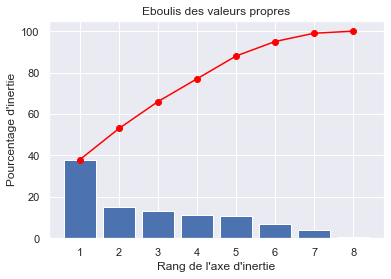

In [85]:
sns.set()
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 70% de la variance est comprise dans les 3 premières composantes. Et 80% de la variance pour les 4 premières composantes.

Intéressons nous maintenant aux composantes.
La formule de ce calcul nous est donnée par l'attribut components_.

In [86]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.502615,-0.206471,0.342115,0.052804,0.186099,0.451211,0.218627,0.546714
1,0.085932,0.170036,0.363704,-0.559983,-0.709763,-0.029968,-0.055775,0.100345
2,-0.035752,0.357777,0.353431,0.618750,-0.157367,-0.010276,-0.555641,0.171305
3,0.047044,0.419951,0.307165,0.254104,0.008948,-0.365011,0.721645,-0.091785
4,0.152048,0.787370,-0.341365,-0.254322,0.231230,0.339911,-0.056671,0.059171
5,-0.175483,0.051553,0.507568,-0.413093,0.616203,-0.308795,-0.247006,0.046952
6,-0.761614,0.025084,0.222190,0.013801,-0.021679,0.564464,0.224090,0.021189
7,0.320209,-0.029254,0.328463,0.026350,0.055813,0.364223,-0.071719,-0.804432


In [87]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes)
F1,0.50,-0.21,0.34,0.05,0.19,0.45,0.22,0.55
F2,0.09,0.17,0.36,-0.56,-0.71,-0.03,-0.06,0.10
F3,-0.04,0.36,0.35,0.62,-0.16,-0.01,-0.56,0.17
F4,0.05,0.42,0.31,0.25,0.01,-0.37,0.72,-0.09
F5,0.15,0.79,-0.34,-0.25,0.23,0.34,-0.06,0.06
F6,-0.18,0.05,0.51,-0.41,0.62,-0.31,-0.25,0.05
F7,-0.76,0.03,0.22,0.01,-0.02,0.56,0.22,0.02
F8,0.32,-0.03,0.33,0.03,0.06,0.36,-0.07,-0.80


J'ai arrondi les résultats pour simplifier l'analyse.

<AxesSubplot:>

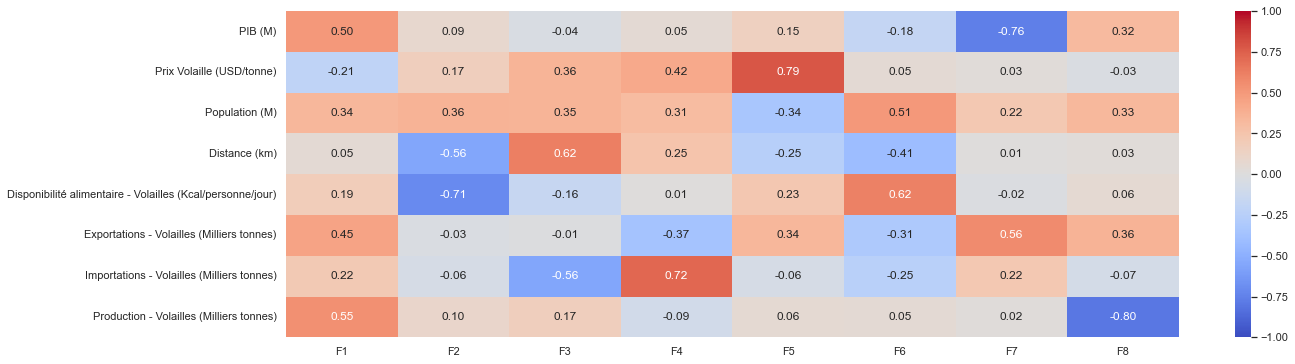

In [88]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Passons au graphe des corrélations.  
Je fais une fonction pour pouvoir afficher F1, F2 et F3, F4.


In [89]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

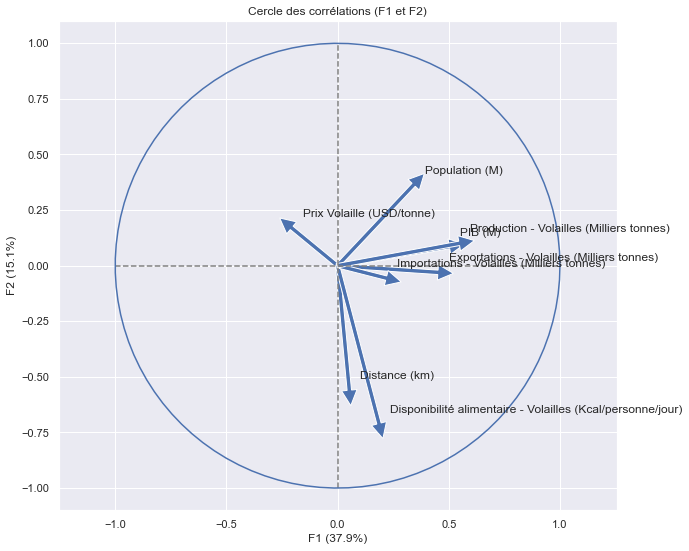

In [90]:
correlation_graph(pca, (0,1), features)

De ce premier cercle de corrélation, on peut déduire que les variables PIB, Production et Exportation de volaille sont corrélée positivement avec F1. On remarque également que Population semble corrélée positivement avec F2, tandis que Distance et Disponibilité sont corrélée négativement avec F2.

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [91]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-0.59236364,  0.83944528,  0.21718656, -0.28100979, -0.2475346 ,
        -0.59121044,  0.11597872,  0.07744926],
       [ 1.03000034, -1.34998265, -1.15631909,  1.65492497, -0.58677604,
        -0.09050117,  0.46727812, -0.41512218],
       [-0.70083657,  0.51373414, -0.51701714, -0.20960144,  0.72912097,
         0.6647214 , -0.1014055 , -0.05445587],
       [-0.70614301,  1.26408938, -0.14415768, -0.3490507 ,  0.25109269,
         0.11464769, -0.14440032, -0.06898427],
       [ 2.99824318,  0.68475061, -3.45350218,  1.90432208, -0.15250326,
        -1.15086251, -0.16389997,  0.68889915]])

Voici la fonction qui va nous permettre d'afficher les individus.

In [92]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set1")

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

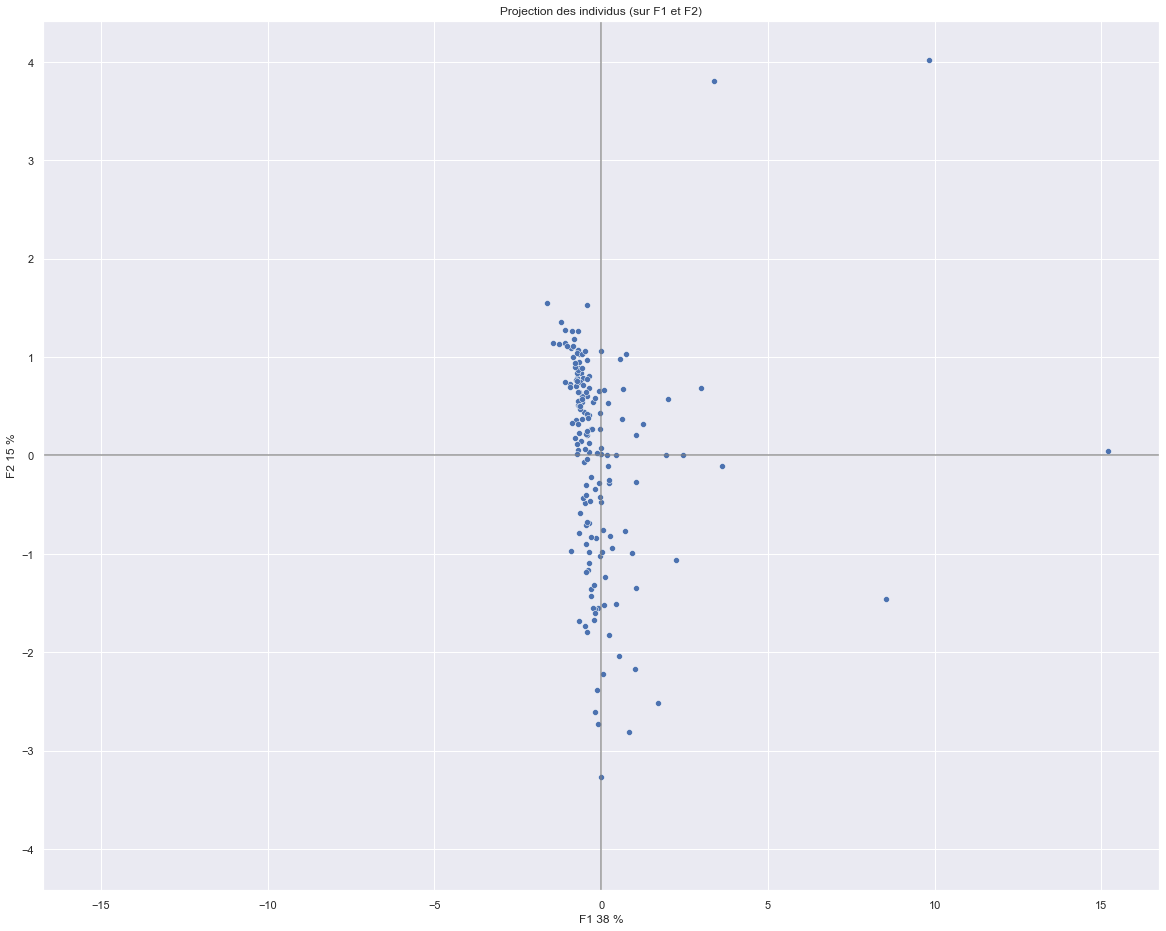

In [93]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=None, figsize=(20,16), marker="o")

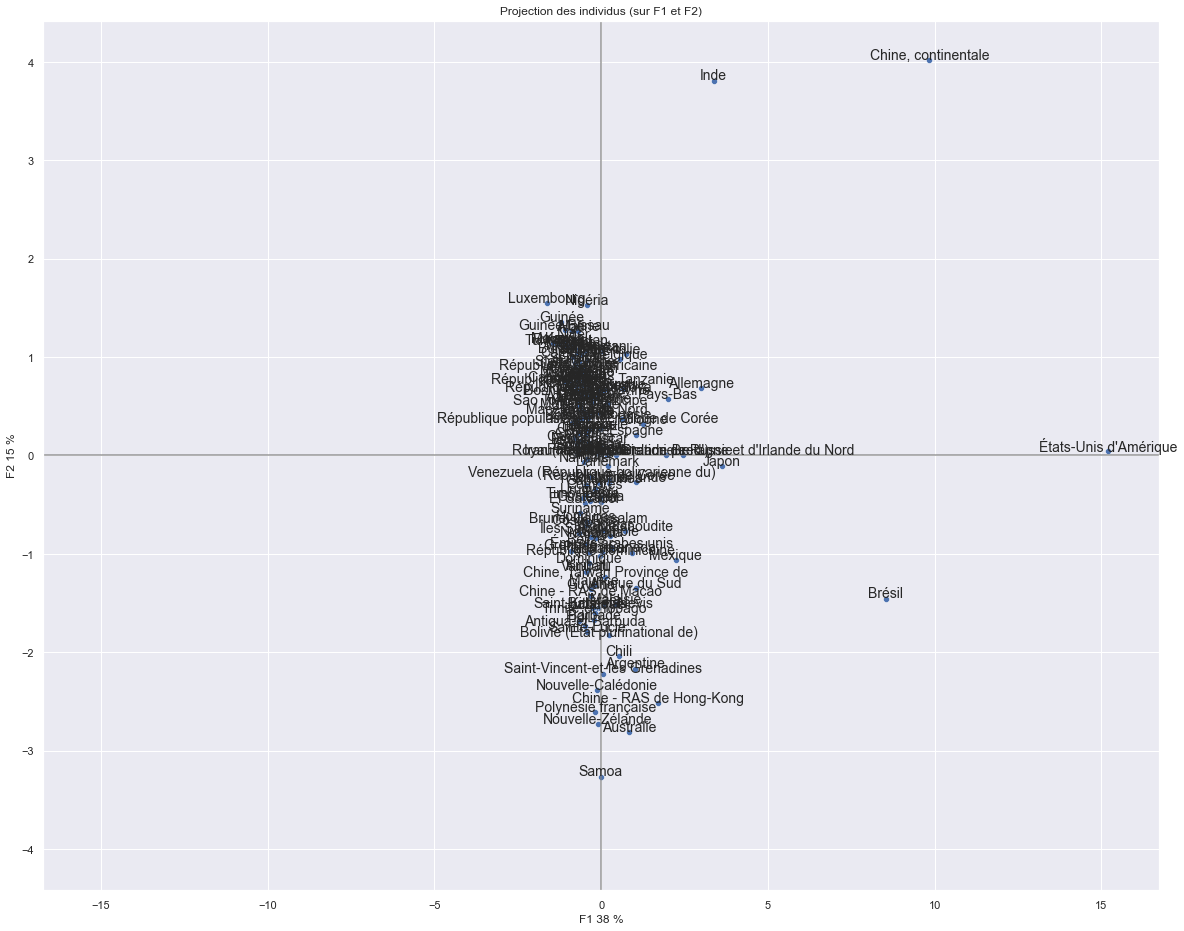

In [94]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

Pour la partie clustering je vais retirer les 4 pays qui se démarque des autres valeurs. Le Brésil, les Etats-Unis d'Amérique, la Chine et l'Inde.   
Et ainsi éviter que ces pays n'influent sur la sélection des groupes par les méthodes de clustering.

## Partie 3 - Clustering

### A - Algorithme k-means

In [95]:
from sklearn.cluster import KMeans

In [96]:
df_new = df.loc[~df.index.isin(["Chine, continentale", "Inde", "Brésil", "États-Unis d'Amérique"])]
df_new.shape

(166, 8)

In [97]:
df_new.head(5)

,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes)
Pays,,,,,,,,
Afghanistan,6933.62,2238.365824,28845767,5573,5.0,129.432836,29.0,28.0
Afrique du Sud,169753.52,1778.700000,50901472,8789,143.0,63.000000,514.0,1667.0
Albanie,5752.12,2669.650000,2994856,1546,85.0,0.000000,38.0,13.0
Algérie,81133.00,2515.950000,35858474,2024,22.0,0.000000,2.0,275.0
Allemagne,2052512.60,1368.770000,81527014,816,71.0,646.000000,842.0,1514.0


In [98]:
X_new = df_new.values

In [99]:
type(X_new)

numpy.ndarray

In [100]:
X_new.shape

(166, 8)

In [101]:
X_new_scaled = scaler.fit_transform(X_new)
X_new_scaled

array([[-0.3283469 , -0.0264411 ,  0.20696598, ...,  0.27183568,
        -0.31222267, -0.51847741],
       [ 0.12457658, -0.63604367,  0.82658193, ..., -0.10395251,
         2.33796013,  1.8445989 ],
       [-0.33163353,  0.54552211, -0.51926956, ..., -0.4603223 ,
        -0.26304402, -0.5401041 ],
       ...,
       [-0.26586103, -0.0264411 ,  1.81948333, ...,  0.27183568,
        -0.46522291, -0.53866232],
       [-0.34622626, -0.0264411 , -0.58871557, ..., -0.4603223 ,
        -0.43790144, -0.55884723],
       [ 0.21676709, -0.0264411 ,  0.04303727, ..., -0.41506899,
         0.4090642 ,  0.38119289]])

On va utiliser la méthode du coude pour déterminer le nombre de cluster optimal.

In [102]:
inertia = []
k_list = range(1, 10)

for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_new_scaled) 
  inertia.append(kmeans.inertia_)

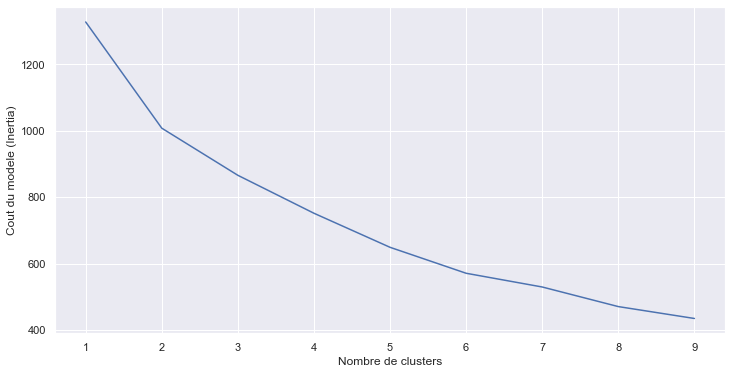

In [103]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Cout du modele (Inertia)")
ax.set_xlabel("Nombre de clusters")
ax = plt.plot(k_list, inertia)

COEFFICIENT DE SILHOUETTE

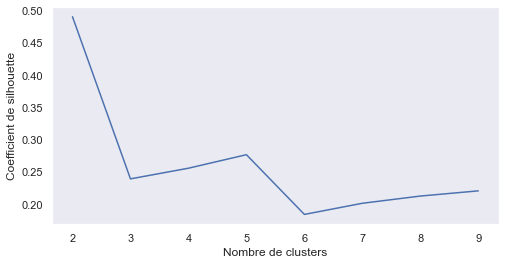

[0.4908678920273099,
 0.23952615867751026,
 0.2560436621146293,
 0.2770067888931063,
 0.18441401134218938,
 0.20168809766683687,
 0.21287576047859047,
 0.22092880975377063]

In [104]:
from sklearn.metrics import silhouette_score
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X_new_scaled)
    tab_silhouette.append(silhouette_score(X_new_scaled,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

Le coefficient de silhouette nous donne 2 clusters avec le score le plus élevé. Mais avec la méthode du coude nous voyons que l'inertie est trop elevé pour 2. Je choisis donc 5 clusters car c'est là où le coefficient est le plus élevé entre 3 et 6 clusters.

In [105]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(X_new_scaled)
clusters_kmeans = kmeans_model.predict(X_new_scaled)

J'ajoute au dataframe original une nouvelle colonne "Cluster_kmeans", ainsi nous verrons quel pays est associé à quel cluster.

In [106]:
# Ajout du numéro de cluster au dataframe
df_new["Cluster_kmeans"] = clusters_kmeans
df_new

/var/folders/td/c26psjjd02d96xkgx9bsmm8m0000gn/T/ipykernel_3985/2874038433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Cluster_kmeans"] = clusters_kmeans


,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes),Cluster_kmeans
Pays,,,,,,,,,
Afghanistan,6.933620e+03,2238.365824,28845767,5573,5.0,129.432836,29.0,28.0,0
Afrique du Sud,1.697535e+05,1778.700000,50901472,8789,143.0,63.000000,514.0,1667.0,1
Albanie,5.752120e+03,2669.650000,2994856,1546,85.0,0.000000,38.0,13.0,0
Algérie,8.113300e+04,2515.950000,35858474,2024,22.0,0.000000,2.0,275.0,0
Allemagne,2.052513e+06,1368.770000,81527014,816,71.0,646.000000,842.0,1514.0,4
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1.404498e+05,2238.365824,6923823,5234,147.0,94.000000,433.0,48.0,2
Équateur,3.751075e+04,685.190000,14797818,9419,83.0,0.000000,0.0,340.0,2
Éthiopie,2.939645e+04,2238.365824,86244559,5492,0.0,129.432836,1.0,14.0,0


Je vais afficher les individus en fonction de leur appartenance aux clusters sur F1 et F2.

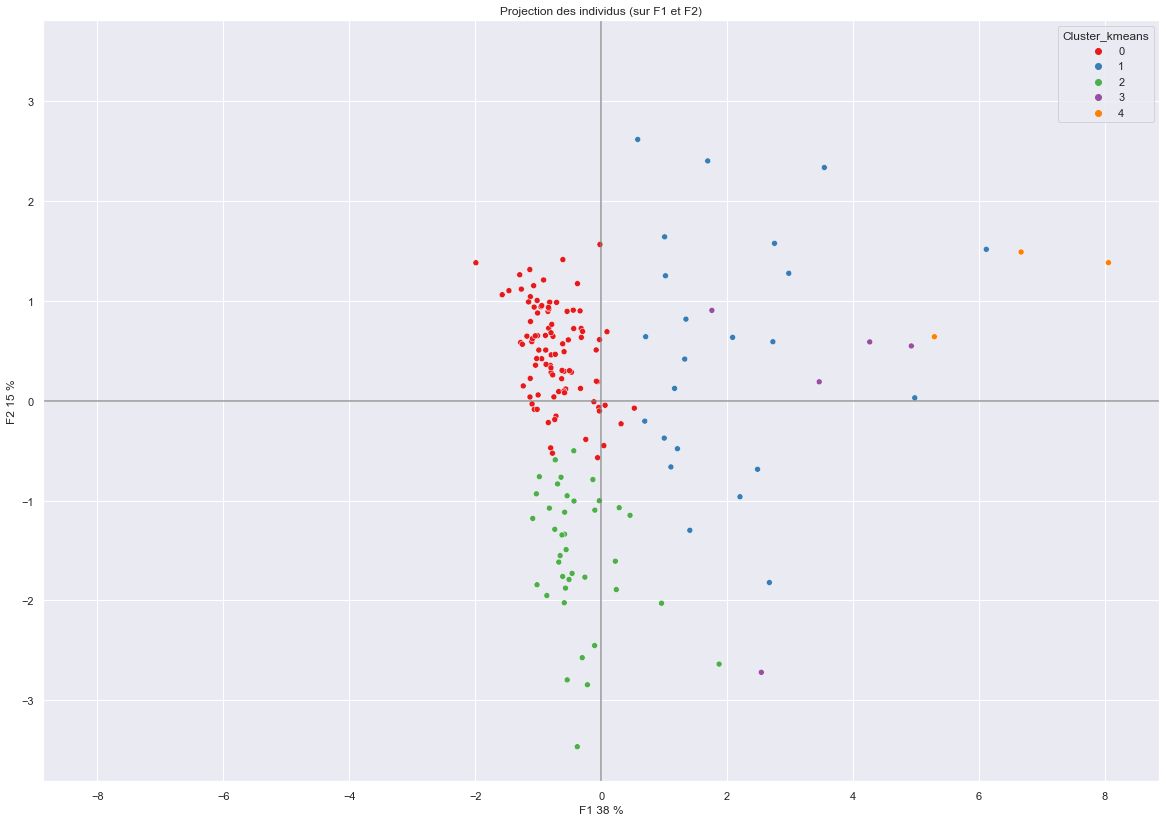

In [147]:
# selection des intitulés des groupes
kmeans_cluster = df_new["Cluster_kmeans"]

sns.set_theme(style='darkgrid', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# Projection des individus
X_new_proj = pca.transform(X_new_scaled)
display_factorial_planes(X_new_proj, x_y, pca, labels=None, clusters=kmeans_cluster, figsize=(20,14), marker="o")

Je vais maintenant afficher les moyennes pour chacun des clusters.

In [118]:
#afficher les moyennes des variables de chaque groupe
groupe=(0,1,2,3,4)
for n in groupe:
    affi=df_new.loc[df_new['Cluster_kmeans']==n].mean()
    print("Groupe ", n, ":")
    print(affi)

Groupe  0 :
PIB (M)                                                       3.672155e+04
Prix Volaille (USD/tonne)                                     2.335790e+03
Population (M)                                                1.154333e+07
Distance (km)                                                 4.318747e+03
Disponibilité alimentaire - Volailles (Kcal/personne/jour)    4.285501e+01
Exportations - Volailles (Milliers tonnes)                    4.796057e+01
Importations - Volailles (Milliers tonnes)                    4.400539e+01
Production - Volailles (Milliers tonnes)                      1.023380e+02
Cluster_kmeans                                                0.000000e+00
dtype: float64
Groupe  1 :
PIB (M)                                                       3.285717e+05
Prix Volaille (USD/tonne)                                     2.027985e+03
Population (M)                                                8.194579e+07
Distance (km)                                                

Représentation de la distribution des variables par groupe en utilisant une boite à moustache.

<AxesSubplot:xlabel='Cluster_kmeans', ylabel='Distance (km)'>

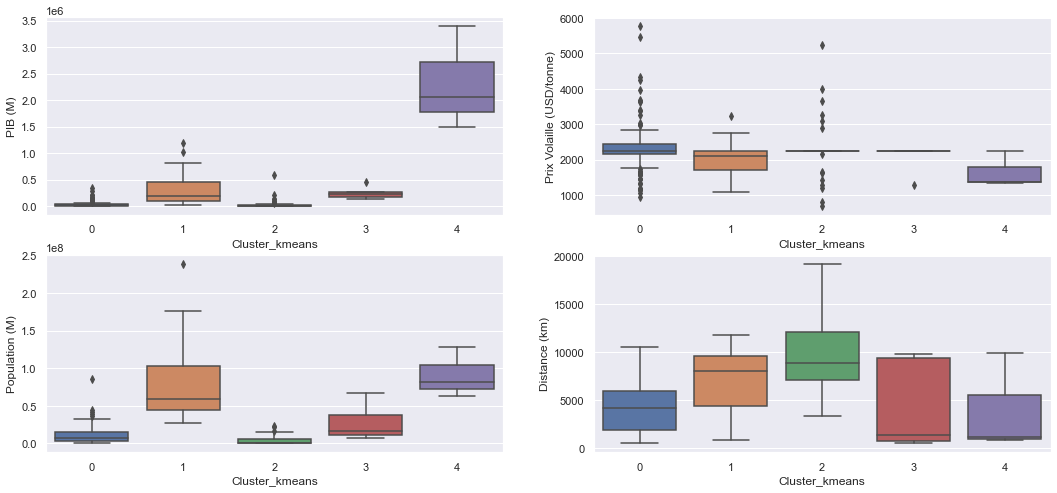

In [119]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(18, 8))

plt.subplot(221)
sns.boxplot(data=df_new, x='Cluster_kmeans', y='PIB (M)')
plt.subplot(222)
sns.boxplot(data=df_new, x='Cluster_kmeans', y='Prix Volaille (USD/tonne)')
plt.subplot(223)
sns.boxplot(data=df_new, x='Cluster_kmeans', y='Population (M)')
plt.subplot(224)
sns.boxplot(data=df_new, x='Cluster_kmeans', y='Distance (km)')

<AxesSubplot:xlabel='Cluster_kmeans', ylabel='Production - Volailles (Milliers tonnes)'>

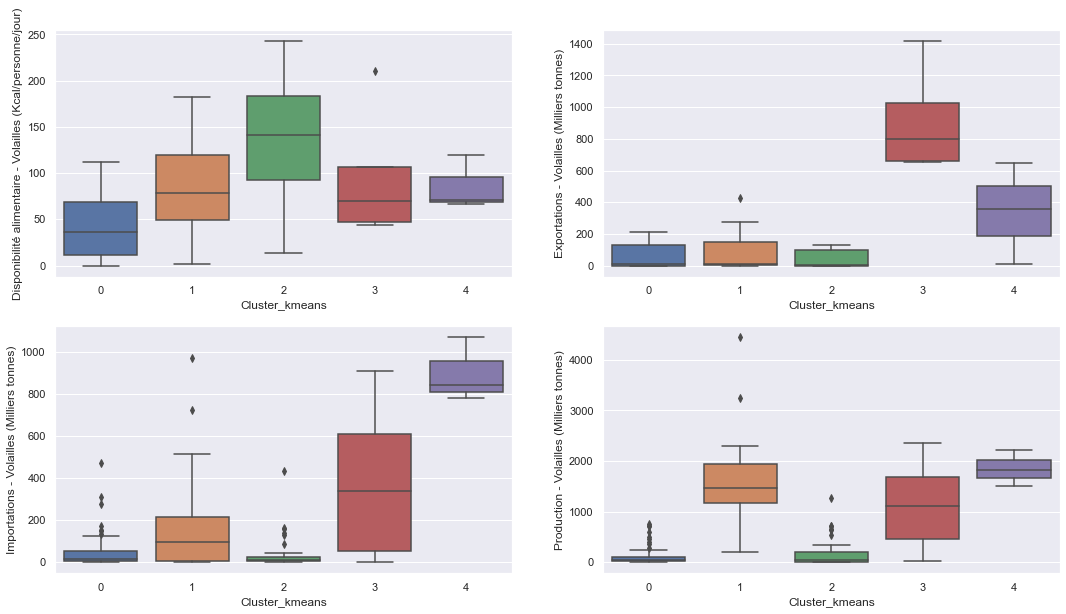

In [120]:
plt.figure(figsize=(18, 10))

plt.subplot(221)
sns.boxplot(data=df_new, x='Cluster_kmeans', y='Disponibilité alimentaire - Volailles (Kcal/personne/jour)')
plt.subplot(222)
sns.boxplot(data=df_new, x='Cluster_kmeans', y='Exportations - Volailles (Milliers tonnes)')
plt.subplot(223)
sns.boxplot(data=df_new, x='Cluster_kmeans', y='Importations - Volailles (Milliers tonnes)')
plt.subplot(224)
sns.boxplot(data=df_new, x='Cluster_kmeans', y='Production - Volailles (Milliers tonnes)')

In [121]:
# Moyenne globale
df_new.mean()

PIB (M)                                                       1.249699e+05
Prix Volaille (USD/tonne)                                     2.258304e+03
Population (M)                                                2.147865e+07
Distance (km)                                                 6.025596e+03
Disponibilité alimentaire - Volailles (Kcal/personne/jour)    7.409309e+01
Exportations - Volailles (Milliers tonnes)                    8.137700e+01
Importations - Volailles (Milliers tonnes)                    8.613870e+01
Production - Volailles (Milliers tonnes)                      3.876094e+02
Cluster_kmeans                                                7.831325e-01
dtype: float64

CARACTERISTIQUES DE CHAQUE GROUPE  

**GROUPE 0**  
Un PIB parmi les plus faible  
Une population faible  
Une distance moyenne avec la France  
Une disponibilité alimentaire de volailles des plus faible    
Un niveau d'importation/exportation des plus faible  
Une production de volailles faible    


**GROUPE 1**  
Un PIB supérieur à la moyenne  
Une population supérieure à la moyenne  
Une distance avec la France supérieure à la moyenne     
Une disponibilité alimentaire de volailles légèrement supérieure à la moyenne    
Un niveau d'importation/exportation assez faible    
Une production de volailles parmi les plus élevée  


**GROUPE 2**  
Un PIB parmi les plus faibles  
Une population des plus faible  
Une distance avec la France parmi les plus élevée     
Une disponibilité alimentaire de volailles la plus élevée  
Un niveau d'importation/exportation des plus faible  
Une production de volailles des plus faible  


**GROUPE 3**  
Un PIB parmi les plus faible 
Une population supérieure à la moyenne
Une distance avec la France parmi les plus faibles  
Une disponibilité alimentaire de volailles autour de la moyenne     
Un niveau d'importation/exportation assez élevé    
Une production de volailles assez élevée  


**GROUPE 4**  
Un PIB des plus élevé  
Un prix par tonne de la vollaile le plus faible  
Une population élevée. 
Une distance réduite avec la France  
Une disponibilité alimentaire de volailles légèrement supérieure à la moyenne    
Un niveau d'importation/exportation des plus élevé  
Une production de volailles élevée   


**OBSERVATIONS**  
LE GROUPE 4    
Au vu des caractéristiques de chaque groupe la combinaison la plus favorable à la selection du meilleur groupe en terme de besoin de viande de volaille met en avant le groupe numéro 4 :    

PIB (M): 2309.963  
Prix Volaille (USD/tonne): 1.652    
Population (M): 90.805.830  
Distance (km): 3.919    
Disponibilité alimentaire - Volailles (Kcal/personne/jour): 86  
Exportations - Volailles (Milliers tonnes): 338  
Importations - Volailles (Milliers tonnes): 897  
Production - Volailles (Milliers tonnes)  : 1.847  

Le niveau moyen d'importation est très élevé, comme le PIB. De plus ces pays se trouvent proches de la France.  
La population totale moyenne est élevée.      
La disponibilité alimentaire de volailles est juste supérieure à la moyenne.  
Il s'agit également des pays qui produisent en moyenne le plus de volailles donc il y a une demande interne forte.  

In [123]:
# Cluster 4
cluster_4=df_new.loc[df_new['Cluster_kmeans']==4]
cluster_4.head()

,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes),Cluster_kmeans
Pays,,,,,,,,,
Allemagne,2052512.60,1368.770000,81527014,816,71.0,646.0,842.0,1514.0,4
Japon,3389358.44,2238.365824,128112180,9850,67.0,10.0,1069.0,2215.0,4
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,1488016.88,1348.160000,62778295,1091,120.0,359.0,779.0,1814.0,4


### B - Classification ascendante hiérarchique

J'importe les librairies.

In [124]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

La méthode de Ward est une technique de clustering qui regroupe des données en clusters en minimisant la variance à l'intérieur de chaque cluster. Elle fusionne les clusters les plus similaires à chaque étape, jusqu'à ce qu'il ne reste plus qu'un seul cluster.

In [125]:
#calculer les distances en spécifiant la méthode à utiliser
Z = linkage(X_new_scaled, method="ward")
Z[:10]

array([[4.70000000e+01, 7.90000000e+01, 1.14022913e-01, 2.00000000e+00],
       [3.70000000e+01, 6.20000000e+01, 1.53699122e-01, 2.00000000e+00],
       [1.50000000e+01, 1.27000000e+02, 1.56605895e-01, 2.00000000e+00],
       [1.01000000e+02, 1.43000000e+02, 1.85980357e-01, 2.00000000e+00],
       [3.80000000e+01, 1.32000000e+02, 2.04464132e-01, 2.00000000e+00],
       [5.80000000e+01, 1.50000000e+02, 2.20191437e-01, 2.00000000e+00],
       [1.48000000e+02, 1.68000000e+02, 2.24001058e-01, 3.00000000e+00],
       [1.33000000e+02, 1.47000000e+02, 2.54196870e-01, 2.00000000e+00],
       [1.41000000e+02, 1.73000000e+02, 2.74820615e-01, 3.00000000e+00],
       [6.00000000e+01, 1.23000000e+02, 2.93824178e-01, 2.00000000e+00]])

Nous pouvons désormais afficher le dendrogramme.  
Notez que nous spécifions les labels et l'orientation :

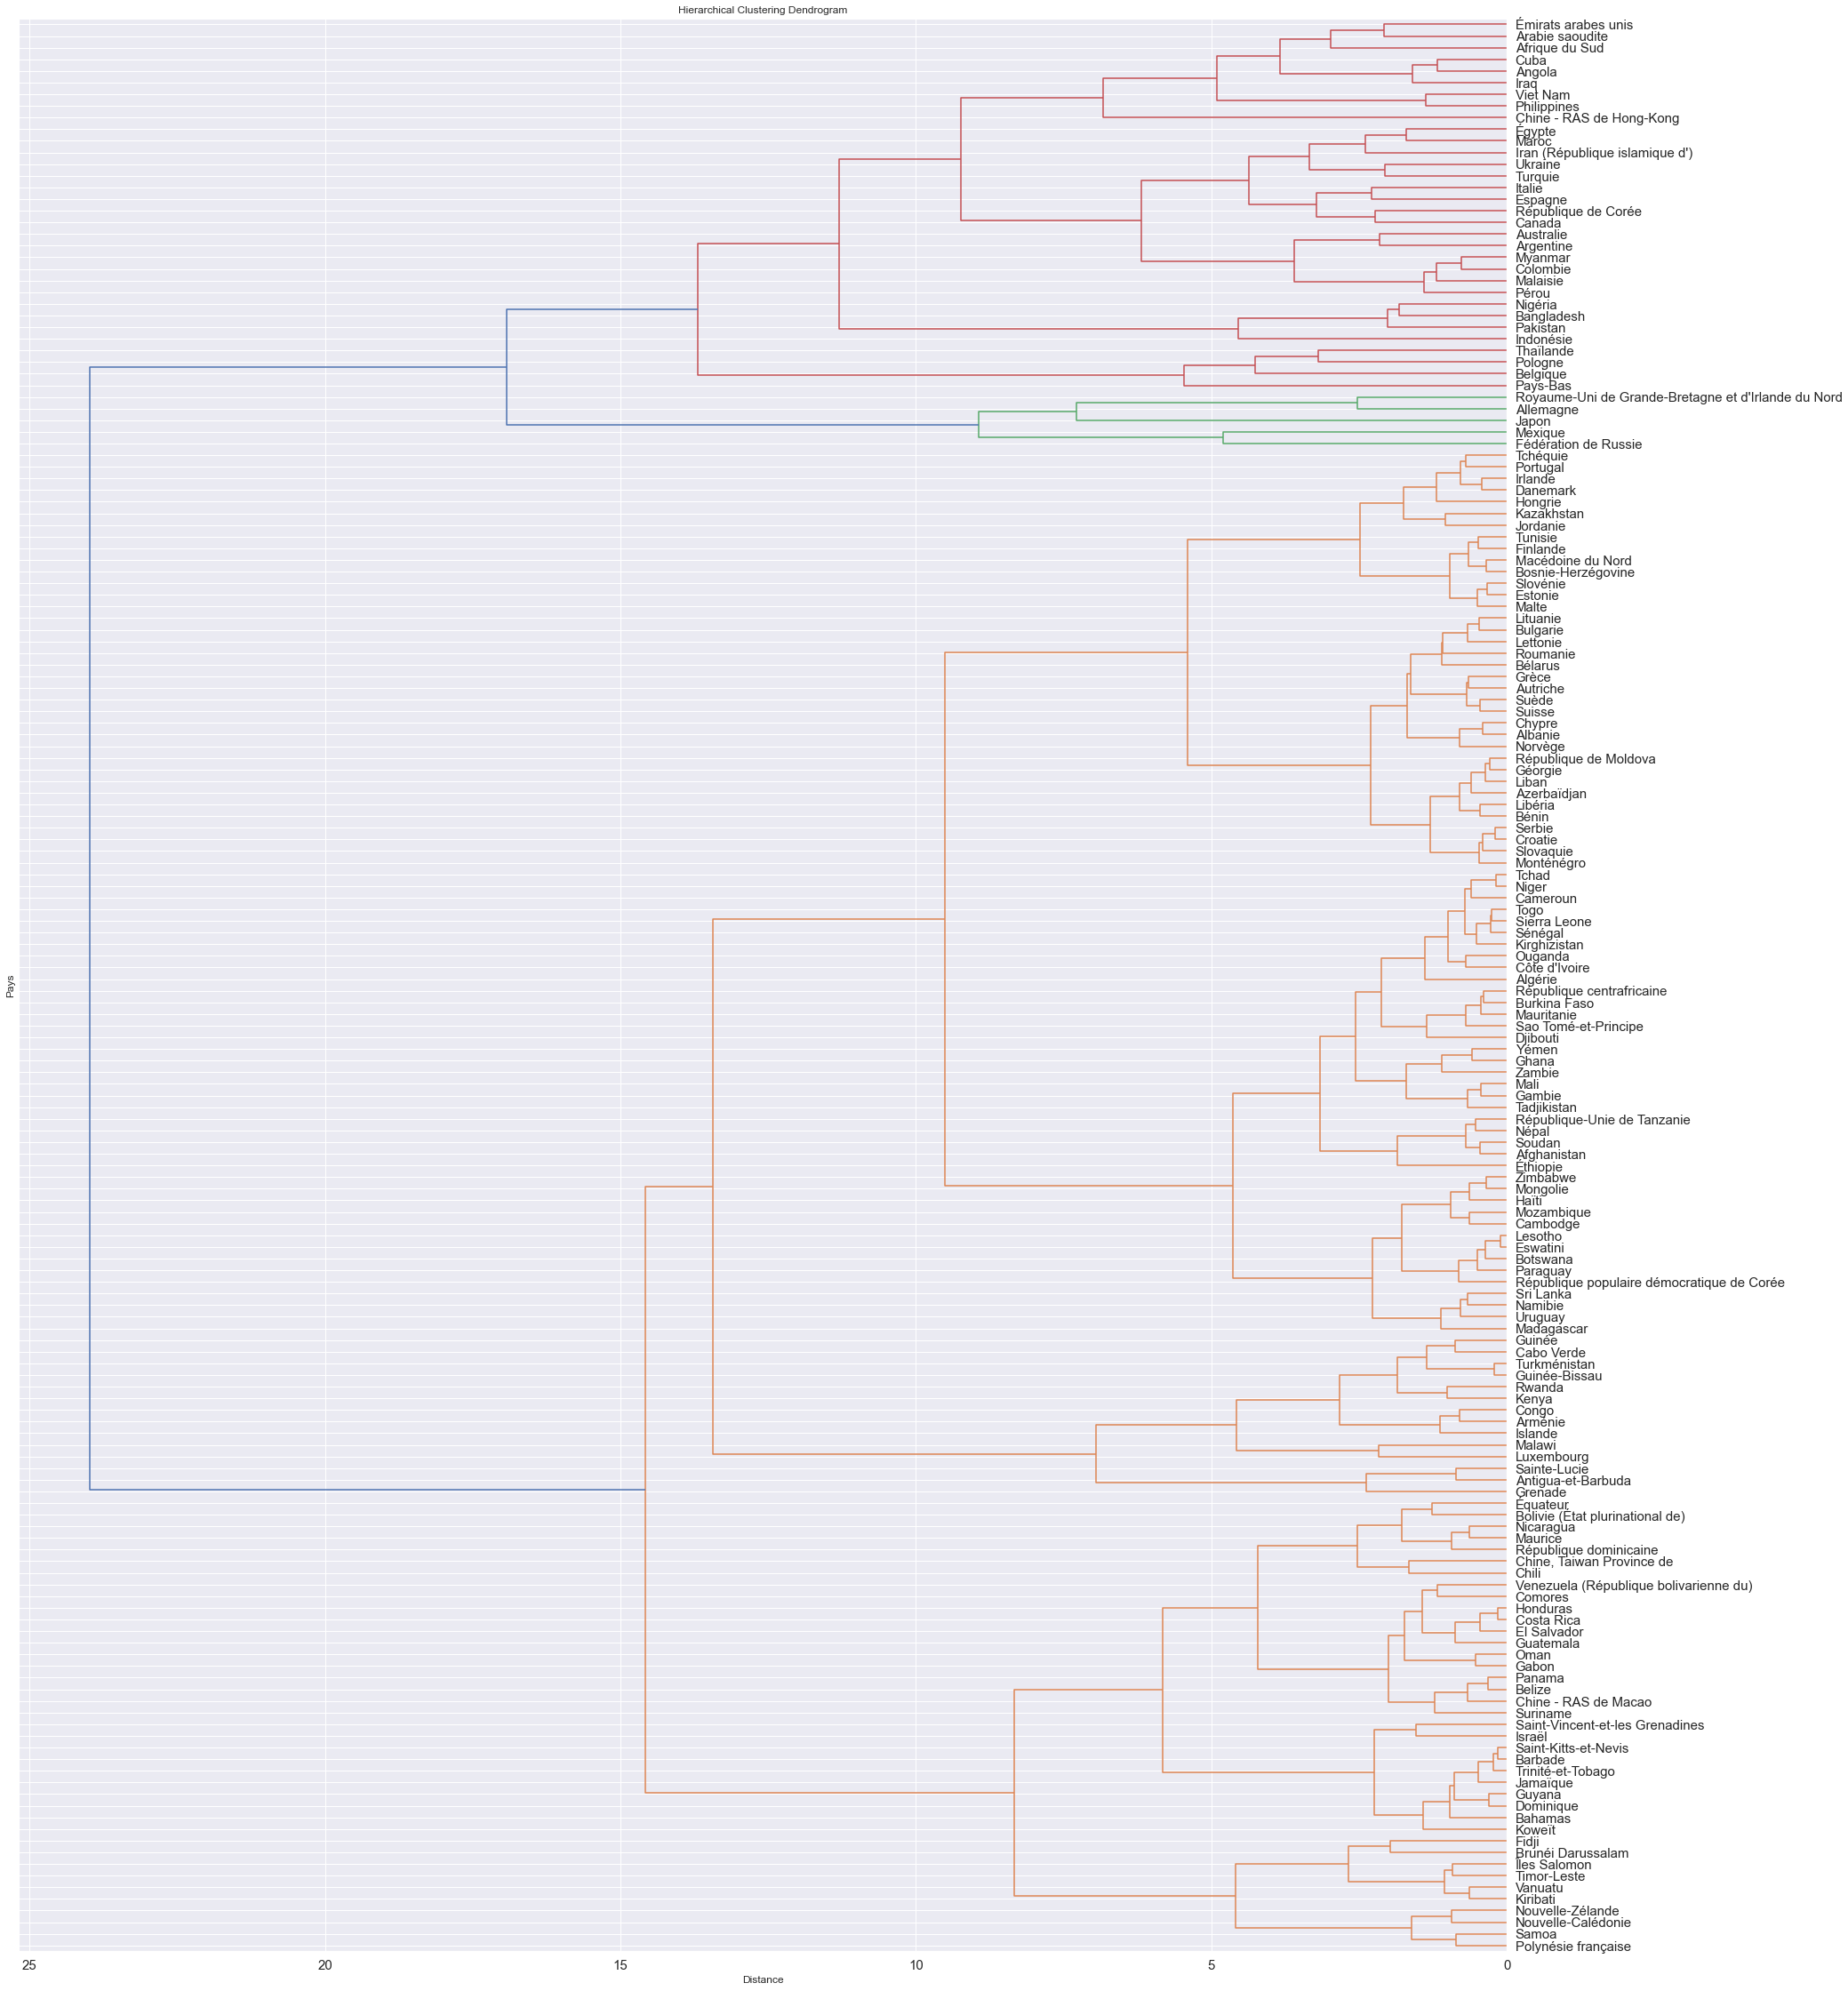

In [126]:
names_new = df_new.index

fig, ax = plt.subplots(1, 1, figsize=(30,40))

_ = dendrogram(Z, ax=ax, labels=names_new, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

Ensuite, on défini le nombre de clusters que l'on souhaite. À partir du dendrogramme je considère que la distance 10 propose une séparation homogène. Ce qui nous donne 7 clusters.

In [127]:
k=7
cah_clusters = fcluster(Z, k, criterion='maxclust')
cah_clusters

array([3, 7, 3, 3, 4, 7, 2, 7, 7, 2, 7, 3, 3, 1, 6, 1, 5, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 2, 3, 3, 7, 1, 7, 1, 3, 7, 1, 2, 1, 3, 7, 3, 3, 3, 1,
       1, 7, 3, 3, 1, 3, 4, 1, 3, 3, 2, 3, 1, 2, 2, 1, 3, 3, 1, 3, 6, 7,
       7, 3, 2, 1, 7, 1, 4, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 7,
       2, 3, 3, 7, 1, 3, 4, 3, 3, 3, 7, 3, 1, 3, 6, 3, 1, 1, 3, 1, 3, 6,
       1, 3, 5, 7, 5, 1, 3, 7, 3, 4, 2, 3, 7, 3, 1, 3, 3, 1, 1, 2, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 5, 1, 3, 1, 3, 2, 7, 7, 3,
       1, 1, 7, 3, 3, 3, 7, 7, 1, 3, 1, 1], dtype=int32)

J'ajoute au dataframe original une nouvelle colonne "Cluster_cah", ainsi nous verrons quel pays est associé à quel cluster.

In [128]:
# Ajout du numéro de cluster au dataframe
df_new["Cluster_cah"] = cah_clusters
df_new

/var/folders/td/c26psjjd02d96xkgx9bsmm8m0000gn/T/ipykernel_3985/3913004973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Cluster_cah"] = cah_clusters


,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes),Cluster_kmeans,Cluster_cah
Pays,,,,,,,,,,
Afghanistan,6.933620e+03,2238.365824,28845767,5573,5.0,129.432836,29.0,28.0,0,3
Afrique du Sud,1.697535e+05,1778.700000,50901472,8789,143.0,63.000000,514.0,1667.0,1,7
Albanie,5.752120e+03,2669.650000,2994856,1546,85.0,0.000000,38.0,13.0,0,3
Algérie,8.113300e+04,2515.950000,35858474,2024,22.0,0.000000,2.0,275.0,0,3
Allemagne,2.052513e+06,1368.770000,81527014,816,71.0,646.000000,842.0,1514.0,4,4
...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1.404498e+05,2238.365824,6923823,5234,147.0,94.000000,433.0,48.0,2,7
Équateur,3.751075e+04,685.190000,14797818,9419,83.0,0.000000,0.0,340.0,2,1
Éthiopie,2.939645e+04,2238.365824,86244559,5492,0.0,129.432836,1.0,14.0,0,3


Je vais afficher les individus en fonction de leur appartenance aux clusters CAH sur F1 et F2.

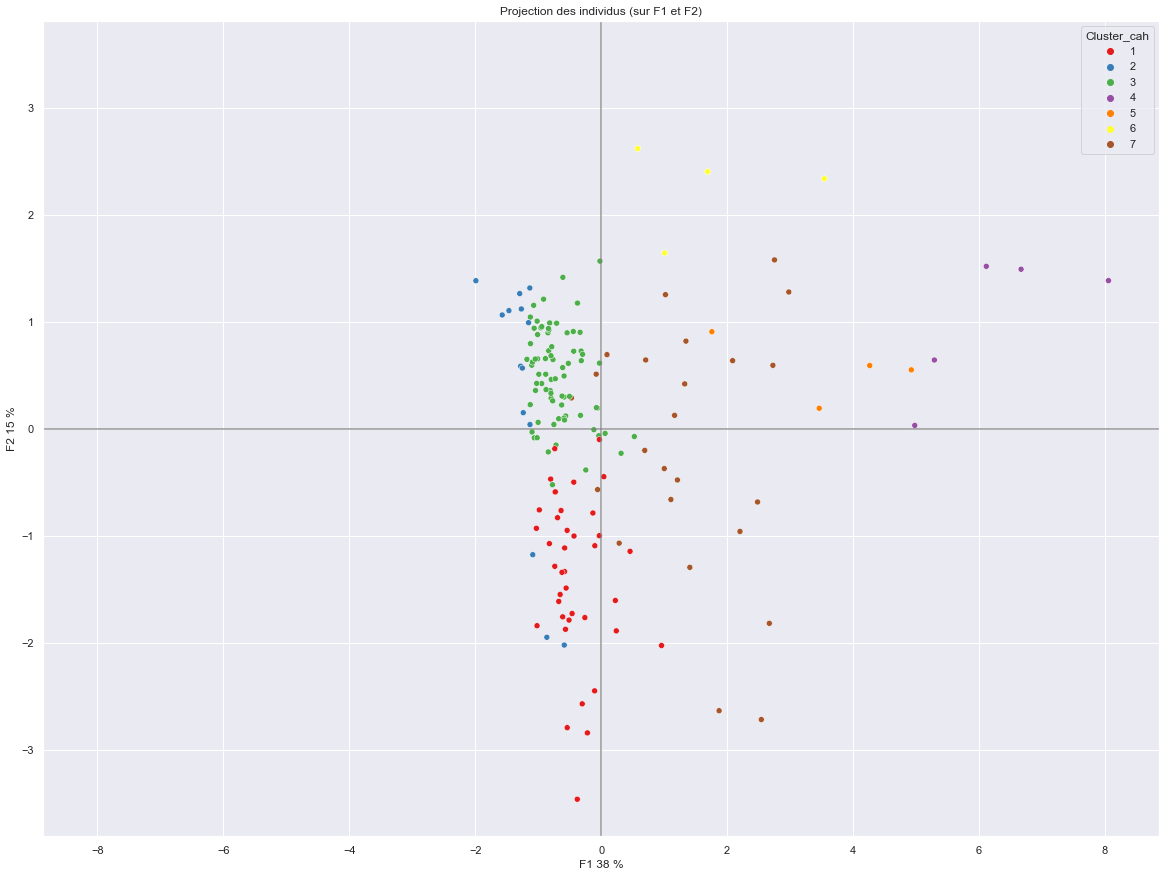

In [145]:
# selection des intitulés des groupes
kmeans_cluster = df_new["Cluster_cah"]

# Projection des individus
X_new_proj = pca.transform(X_new_scaled)
display_factorial_planes(X_new_proj, x_y, pca, labels=None, clusters=kmeans_cluster, figsize=(20,15), marker="o")

Je vais maintenant afficher les moyennes pour chacun des clusters.

In [130]:
#afficher les moyennes des variables de chaque groupe
groupe=(1,2,3,4,5,6,7)
for n in groupe:
    moy=df_new.loc[df_new['Cluster_cah']==n].mean()
    print("Groupe ", n, ":")
    print(moy)

Groupe  1 :
PIB (M)                                                       2.463002e+04
Prix Volaille (USD/tonne)                                     2.141838e+03
Population (M)                                                4.525530e+06
Distance (km)                                                 9.805974e+03
Disponibilité alimentaire - Volailles (Kcal/personne/jour)    1.241142e+02
Exportations - Volailles (Milliers tonnes)                    3.155033e+01
Importations - Volailles (Milliers tonnes)                    3.346215e+01
Production - Volailles (Milliers tonnes)                      1.774643e+02
Cluster_kmeans                                                1.794872e+00
Cluster_cah                                                   1.000000e+00
dtype: float64
Groupe  2 :
PIB (M)                                                       7.722911e+03
Prix Volaille (USD/tonne)                                     4.118805e+03
Population (M)                                               

Représentation de la distribution des variables par groupe en utilisant une boite à moustache.

<AxesSubplot:xlabel='Cluster_cah', ylabel='Distance (km)'>

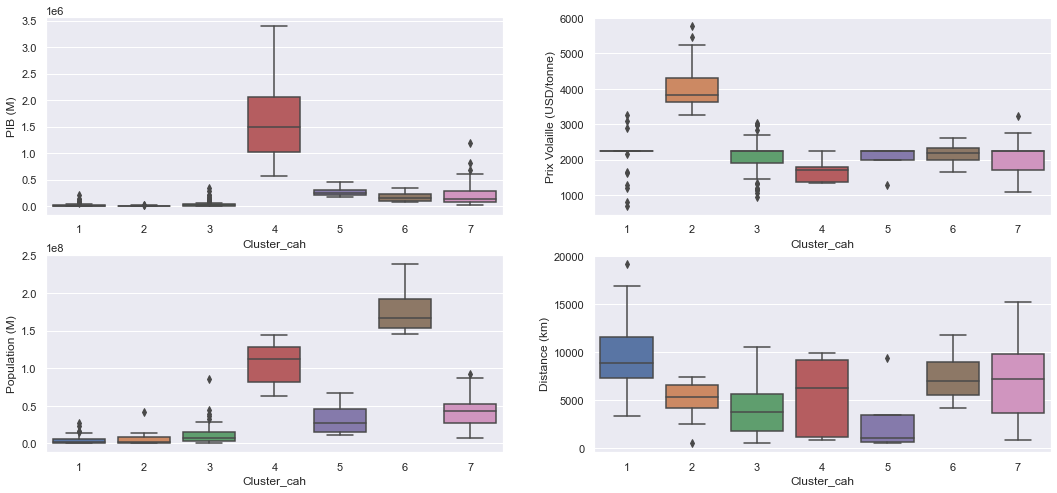

In [131]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(18, 8))

plt.subplot(221)
sns.boxplot(data=df_new, x='Cluster_cah', y='PIB (M)')
plt.subplot(222)
sns.boxplot(data=df_new, x='Cluster_cah', y='Prix Volaille (USD/tonne)')
plt.subplot(223)
sns.boxplot(data=df_new, x='Cluster_cah', y='Population (M)')
plt.subplot(224)
sns.boxplot(data=df_new, x='Cluster_cah', y='Distance (km)')

<AxesSubplot:xlabel='Cluster_cah', ylabel='Production - Volailles (Milliers tonnes)'>

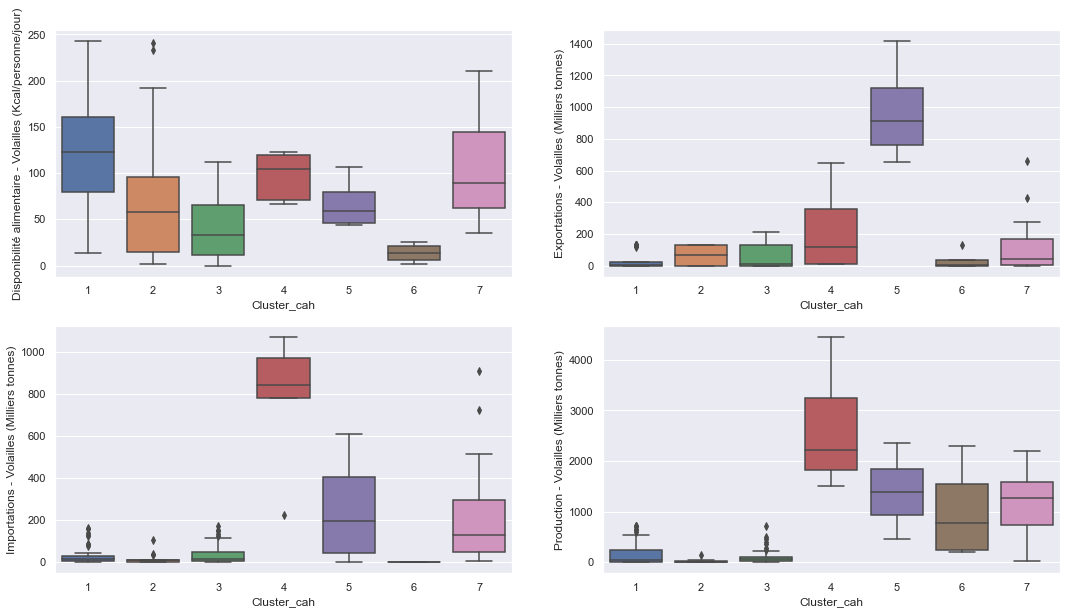

In [132]:
plt.figure(figsize=(18, 10))

plt.subplot(221)
sns.boxplot(data=df_new, x='Cluster_cah', y='Disponibilité alimentaire - Volailles (Kcal/personne/jour)')
plt.subplot(222)
sns.boxplot(data=df_new, x='Cluster_cah', y='Exportations - Volailles (Milliers tonnes)')
plt.subplot(223)
sns.boxplot(data=df_new, x='Cluster_cah', y='Importations - Volailles (Milliers tonnes)')
plt.subplot(224)
sns.boxplot(data=df_new, x='Cluster_cah', y='Production - Volailles (Milliers tonnes)')

In [133]:
# Moyenne globale
df_new.mean()

PIB (M)                                                       1.249699e+05
Prix Volaille (USD/tonne)                                     2.258304e+03
Population (M)                                                2.147865e+07
Distance (km)                                                 6.025596e+03
Disponibilité alimentaire - Volailles (Kcal/personne/jour)    7.409309e+01
Exportations - Volailles (Milliers tonnes)                    8.137700e+01
Importations - Volailles (Milliers tonnes)                    8.613870e+01
Production - Volailles (Milliers tonnes)                      3.876094e+02
Cluster_kmeans                                                7.831325e-01
Cluster_cah                                                   3.174699e+00
dtype: float64

CARACTERISTIQUES DE CHAQUE GROUPE  

**GROUPE 1**  
Un PIB et population des plus faibles   
Une distance assez élevée avec la France  
Une disponibilité alimentaire de volailles parmi les plus élevée    
Un niveau d'importation/exportation des plus faible  
Une production de volailles faible   

**GROUPE 2**  
Un PIB et population des plus faibles   
Un prix de la volaille parmi le plus élevé  
Une distance assez moyenne avec la France  
Une disponibilité alimentaire de volailles dans la moyenne  
Un niveau d'importation/exportation des plus faible  
Une production de volailles faible    

**GROUPE 3**  
Un PIB et population des plus faibles   
Une distance parmi les plus faible avec la France  
Une disponibilité alimentaire de volailles des plus faible  
Un niveau d'importation/exportation des plus faible  
Une production de volailles faible  

**GROUPE 4**  
Un PIB et population des plus élevés     
Une distance avec la France légèrement supérieure à la moyenne  
Une disponibilité alimentaire de volailles parmi les plus élevée    
Un niveau d'importation/exportation des plus élevé  
Une production de volailles le plus élevée   

**GROUPE 5**  
Un PIB plus elevé que la moyenne  
Une population un peu plus élevée que la moyenne  
Une distance avec la France la plus faible   
Une disponibilité alimentaire de volailles moyenne  
Un niveau d'importation/exportation des plus élevé  
Une production de volailles assez élevée   

**GROUPE 6**  
Un PIB plus elevé que la moyenne  
Une population la plus élevée  
Une distance avec la France légèrement supérieure à la moyenne   
Une disponibilité alimentaire de volailles la plus faible  
Un niveau d'importation/exportation des plus faible  
Une production de volailles assez élevée   

**GROUPE 7**  
Un PIB plus elevé que la moyenne  
Une population un peu plus élevée que la moyenne  
Une distance avec la France légèrement supérieure à la moyenne   
Une disponibilité alimentaire de volailles parmi les plus élevée      
Un niveau d'importation/exportation légèrement supérieur à la moyenne  
Une production de volailles assez élevée   


**OBSERVATIONS**  
Au vu des caractéristiques de chaque groupe la combinaison la plus favorable à la selection du meilleur groupe en terme de besoin de viande de volaille met en avant le groupe numéro 4 :    

PIB (M): 1705.707   
Prix Volaille (USD/tonne): 1.690  
Population (M): 105.869.300  
Distance (km): 5.433    
Disponibilité alimentaire - Volailles (Kcal/personne/jour): 97  
Exportations - Volailles (Milliers tonnes): 227  
Importations - Volailles (Milliers tonnes): 777    
Production - Volailles (Milliers tonnes)  : 2.647    

Le niveau d'importation moyen est très élevé, comme le PIB. De plus ces pays se trouvent relativement proches de la France.  
La population totale moyenne est assez élevée.      
La disponibilité alimentaire de volailles est juste supérieure à la moyenne.  
Ces pays produisent également beaucoup de volailles, ce qui indique un marché demandeur.

In [141]:
# Cluster 5
cluster_cah=df_new.loc[df_new['Cluster_cah']==4]
cluster_cah.head()

,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes),Cluster_kmeans,Cluster_cah
Pays,,,,,,,,,,
Allemagne,2052512.60,1368.770000,81527014,816,71.0,646.0,842.0,1514.0,4,4
Fédération de Russie,1024570.02,1788.730000,144460587,6221,104.0,115.0,226.0,4444.0,1,4
Japon,3389358.44,2238.365824,128112180,9850,67.0,10.0,1069.0,2215.0,4,4
Mexique,574076.57,1704.600000,112468334,9190,123.0,9.0,972.0,3249.0,1,4
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,1488016.88,1348.160000,62778295,1091,120.0,359.0,779.0,1814.0,4,4


## Conclusion

Je vais réaliser deux matrices de corrélations pour chacun de mes clusters. Et ainsi observer leur ressemblance.

<AxesSubplot:>

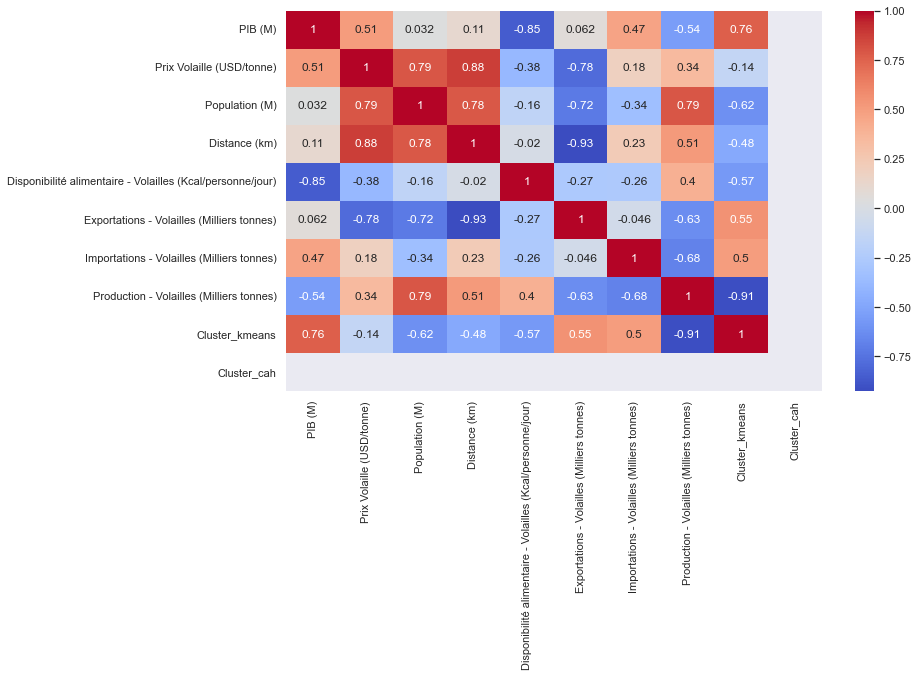

In [142]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(cluster_cah.corr(), annot=True, cmap='coolwarm')

Sur cette matrice de corrélation CAH, on peut observer les corrélation positive suivante :  
- 0.88 entre le prix de la volaille et la distance.   
- 0.79 entre le prix de la volaille et la population.   
- 0.78 entre la population et la distance.   
- 0.79 entre la population et la production de volaille.     

Nous observons également les corrélation négative suivantes :  
- -0.93 entre la distance et l'exportation de volaille.  
- -0.85 entre le PIB et la disponibilité alimentaire.  
- -0.78 entre le prix de la volaille et l'exportation.  

<AxesSubplot:>

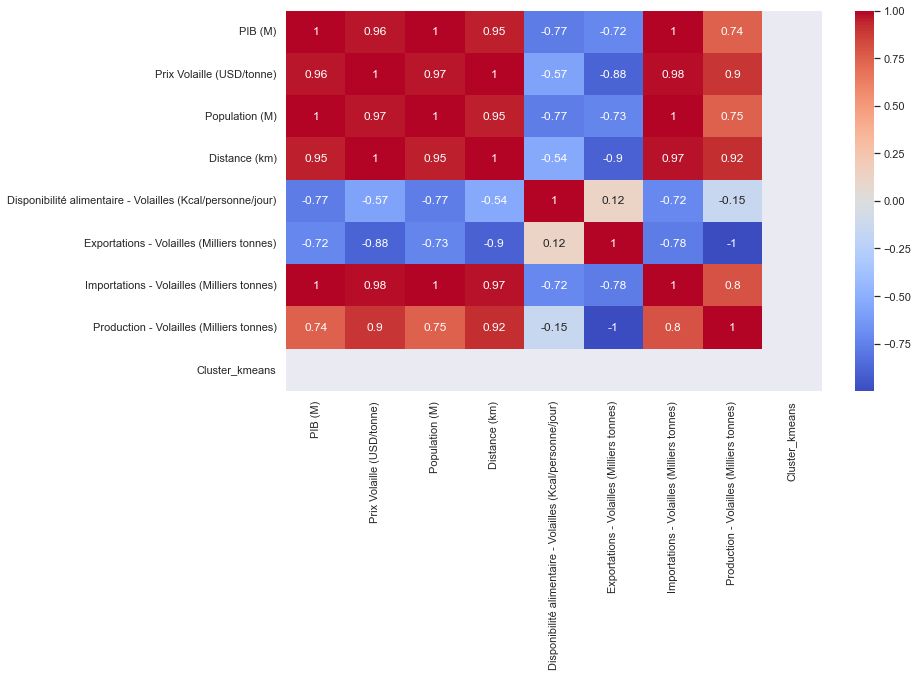

In [143]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(cluster_4.corr(), annot=True, cmap='coolwarm')

Sur cette matrice de corrélation Kmeans, on peut observer les corrélation positive suivante :  
- 1 entre le prix de la volaille et la distance.  
- 0.96 entre le PIB et le prix de la volaille ainsi que la distance.      
- 0.97 entre le prix de la volaille et la population ainsi que l'importation de volaille.   
- 0.95 entre la population et la distance.   
- 0.97 entre la distance et l'importation de volaille.     

Nous observons également les corrélation négative suivantes :  
- -0.90 entre la distance et l'exportation de volaille.  
- -0.77 entre la disponibilité alimentaire et le PIB ainsi que la population.  
- -0.88 entre le prix de la volaille et l'exportation.  

Ainsi on remarque que pour la plupart des corrélations il y a concordance entre les deux clusters. Ce qui est confirmé par le fait que l'on retrouve les mêmes pays dans les deux clusters suivant les deux méthodes utilisées.

En conclusion de notre analyse statistique pour l'entreprise française La poule qui chante, nous avons pu déterminer une liste de pays cibles pour son expansion internationale.   
Les méthodes de classification ascendante hiérarchique (CAH) et de k-means nous ont permis d'identifier cinq pays (Allemagne, Japon, Mexique, Royaume-Uni et Russie) qui répondent aux critères suivants : 

- un niveau d'importation de volailles moyen élevé,   
- un PIB élevé,   
- une population totale moyenne élevée,   
- ces pays sont relativement proches de la France,
- ils produisent également beaucoup de volailles, ce qui indique un marché potentiellement demandeur. 

Ces résultats peuvent aider La poule qui chante à cibler des marchés rentables pour son expansion internationale.

Bien sûr, cette liste sera affinée avec les équipes métiers